In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime,timedelta

In [62]:
prospect_engagements=pd.read_csv('../datasets/result_datasets/Email_Engagement_Aggregated/unique_prospect_engagements.csv')

In [64]:
not_clicked_prospects=pd.read_csv('../datasets/result_datasets/not_clicked_prospects.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_18796\762317819.py:1: DtypeWarning: Columns (3,7,10,13,14,15,22,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  not_clicked_prospects=pd.read_csv('../datasets/result_datasets/not_clicked_prospects.csv')


In [66]:
pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

In [68]:
prospect_engagements['status_time_utc']=pd.to_datetime(prospect_engagements['status_time_utc'],utc=True)

In [70]:
prospect_engagements.shape

(5663590, 30)

In [72]:
prospect_engagements.columns

Index(['Unnamed: 0', 'FirstName', 'CompanyName', 'mail', 'Email', 'CTA',
       'Domain', 'ID', 'source', 'date', 'raw_status', 'status', 'status_time',
       'reason', 'status_time_utc', 'derived_mail', 'derived_email',
       'is_email_sent', 'is_email_clicked', 'is_email_opened', 'is_responded',
       'is_bounced', 'is_unsubscribed', 'is_mail_not_sent', 'is_scheduled',
       '2_weeks_ago', '4_weeks_ago', '8_weeks_ago', '12_weeks_ago',
       'day_of_week'],
      dtype='object')

In [74]:
prospect_engagements.drop(columns=['Unnamed: 0'],inplace=True)

In [76]:
not_clicked_prospects.shape

(148051, 34)

In [78]:
not_clicked_prospects.drop(columns=['Unnamed: 0'],inplace=True)

In [128]:
not_clicked_prospects['derived_mail']=not_clicked_prospects['Email']

## FEATURE ENGINEERING

## Total Emails Sent

In [83]:
total_emails_sent=prospect_engagements.groupby('derived_mail')['is_email_sent'].sum().reset_index(name='total_emails_sent')

In [85]:
total_emails_sent

,derived_mail,total_emails_sent
0,9fake@thomasfellows.com,5
1,Adaku.Ude@sfdph.org,13
2,Ahess@amgen.com,1
3,Carlos.Perez@thermofisher.com,4
4,CarlosOliverMontejano.Ramirez@magna.com,25
...,...,...
157164,å©§å¼ @ashleyfurniture.com,0
157165,å¸†æ¨@its.jnj.com,0
157166,æ´å¼ @its.jnj.com,0
157167,è”šæ±ÿ.æ–‡@gm.com,24


## Total Emails Clicked

In [105]:
total_emails_clicked=prospect_engagements.groupby('derived_mail')['is_email_clicked'].sum().reset_index(name='total_emails_clicked')

In [107]:
total_emails_clicked.sort_values(by='total_emails_clicked',ascending=False)

,derived_mail,total_emails_clicked
7385,anahi.c@byd.com,66
96110,mark_ard@ahm.honda.com,36
143034,tark_martin@ahm.honda.com,36
43499,edgar_morales@honda.com,30
54938,harminder_pooni@ahm.honda.com,30
...,...,...
54005,guerrero.b@pg.com,0
54006,guerrero.marita@pfizer.com,0
54007,guerric.willemart@ab-inbev.com,0
54008,guess.michael@sfgov.org,0


## Total Emails Opened

In [110]:
total_emails_opened=prospect_engagements.groupby('derived_mail')['is_email_opened'].sum().reset_index(name='total_emails_opened')

In [112]:
total_emails_opened.sort_values(by='total_emails_opened',ascending=False)

,derived_mail,total_emails_opened
119744,rama.dasari@apple.com,78
111368,niraj.chaudhary@nexsales.com,77
58949,j_abstender@apple.com,76
118921,r_kuddes@apple.com,72
122316,rhense@apple.com,70
...,...,...
55387,hcortes@rivian.com,0
55388,hcosta@amgen.com,0
55389,hcostilla@ti.com,0
55390,hcox@aep.com,0


## Total Emails Unsubscribed

In [115]:
total_emails_unsubscribed=prospect_engagements.groupby('derived_mail')['is_unsubscribed'].sum().reset_index(name='total_emails_unsubscribed')

In [117]:
total_emails_unsubscribed

,derived_mail,total_emails_unsubscribed
0,9fake@thomasfellows.com,0
1,Adaku.Ude@sfdph.org,0
2,Ahess@amgen.com,0
3,Carlos.Perez@thermofisher.com,0
4,CarlosOliverMontejano.Ramirez@magna.com,0
...,...,...
157164,å©§å¼ @ashleyfurniture.com,0
157165,å¸†æ¨@its.jnj.com,0
157166,æ´å¼ @its.jnj.com,0
157167,è”šæ±ÿ.æ–‡@gm.com,0


## Total Emails Bounced

In [120]:
total_emails_bounced=prospect_engagements.groupby('derived_mail')['is_bounced'].sum().reset_index(name='total_emails_bounced')

In [122]:
total_emails_bounced

,derived_mail,total_emails_bounced
0,9fake@thomasfellows.com,1
1,Adaku.Ude@sfdph.org,0
2,Ahess@amgen.com,3
3,Carlos.Perez@thermofisher.com,0
4,CarlosOliverMontejano.Ramirez@magna.com,6
...,...,...
157164,å©§å¼ @ashleyfurniture.com,0
157165,å¸†æ¨@its.jnj.com,0
157166,æ´å¼ @its.jnj.com,0
157167,è”šæ±ÿ.æ–‡@gm.com,0


In [138]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_sent,on='derived_mail',how='left')

In [139]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_opened,on='derived_mail',how='left')

In [141]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_clicked,on='derived_mail',how='left')

In [143]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_bounced,on='derived_mail',how='left')

In [145]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_unsubscribed,on='derived_mail',how='left')

In [149]:
not_clicked_prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148051 entries, 0 to 148050
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Company Name               147664 non-null  object 
 1   First Name                 148050 non-null  object 
 2   Middle Name                5602 non-null    object 
 3   Last Name                  148026 non-null  object 
 4   Title                      148046 non-null  object 
 5   Level                      139500 non-null  object 
 6   Seniority                  2724 non-null    object 
 7   Department                 139500 non-null  object 
 8   Email ID                   136901 non-null  object 
 9   Email 1                    11150 non-null   object 
 10  Contact_City               126034 non-null  object 
 11  Contact_State              111357 non-null  object 
 12  Contact City               10119 non-null   object 
 13  Contact State              90

## Average Time Between Emails

In [152]:
prospect_engagements['status_time_utc'] = pd.to_datetime(prospect_engagements['status_time_utc'], utc=True)

In [154]:
prospect_engagements.sort_values(by=['derived_mail','status_time_utc'],inplace=True)

In [160]:
sent_emails=prospect_engagements[prospect_engagements['is_email_sent']==1]

In [162]:
sent_emails['time_gap']=sent_emails.groupby('derived_mail')['status_time_utc'].diff().dt.days

C:\Users\Admin\AppData\Local\Temp\ipykernel_18796\1506379369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_emails['time_gap']=sent_emails.groupby('derived_mail')['status_time_utc'].diff().dt.days


In [164]:
avg_time_between_emails=sent_emails.groupby('derived_mail')['time_gap'].mean().reset_index().rename(columns={'time_gap': 'avg_time_between_emails'})

In [166]:
avg_time_between_emails

,derived_mail,avg_time_between_emails
0,9fake@thomasfellows.com,0.250000
1,Adaku.Ude@sfdph.org,1.083333
2,Ahess@amgen.com,NaN
3,Carlos.Perez@thermofisher.com,1.000000
4,CarlosOliverMontejano.Ramirez@magna.com,0.791667
...,...,...
145628,Ø¹Ø¨Ø¯Ø§Ù„Ø±Ø­Ù…Ù†.Ø§Ù„Ø¯Ø±Ø¯ÙŠØ±ÙŠ@aecom.com,1.133333
145629,Ù…Ø­Ù…Ø¯.Ø­Ø³ÙŠÙ†@aecom.com,3.307692
145630,â€žâ€žm.herigstad@abbvie.com,1.730769
145631,ä½³æ›¹@its.jnj.com,0.500000


In [168]:
not_clicked_prospects=not_clicked_prospects.merge(avg_time_between_emails,on='derived_mail',how='left')

## Average Time Between Email Opened

In [173]:
opened_emails=prospect_engagements[prospect_engagements['is_email_opened']==1]

In [244]:
opened_emails.shape

(69800, 29)

In [246]:
opened_emails['time_gap']=opened_emails.groupby('derived_mail')['status_time_utc'].diff().dt.days

C:\Users\Admin\AppData\Local\Temp\ipykernel_18796\3877662092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opened_emails['time_gap']=opened_emails.groupby('derived_mail')['status_time_utc'].diff().dt.days


In [248]:
avg_time_between_emails_opened=opened_emails.groupby('derived_mail')['time_gap'].mean().reset_index().rename(columns={'time_gap': 'avg_time_between_emails_opened'})

In [250]:
avg_time_between_emails_opened

,derived_mail,avg_time_between_emails_opened
0,a-holley@ti.com,NaN
1,a-smith3@ti.com,NaN
2,a.akingboju@apple.com,0.809524
3,a.alexander@samsung.com,NaN
4,a.calzola@samsung.com,26.500000
...,...,...
17270,zstoller@coca-cola.com,0.333333
17271,zulfiqar.haider@cityofchicago.org,NaN
17272,zurielsuarez@dswinc.com,0.500000
17273,zwadie.castro@jacobs.com,7.000000


In [252]:
not_clicked_prospects=not_clicked_prospects.merge(avg_time_between_emails_opened,on='derived_mail',how='left')

## Days Since Last Email Opened

In [255]:
prospect_engagements.sort_values(by=['derived_mail','status_time_utc'],ascending=True,inplace=True)

In [257]:
prospects_last_email_opened_data=prospect_engagements[prospect_engagements['is_email_opened']==1].groupby('derived_mail')['status_time_utc'].max().reset_index(name='last_email_opened_date')

In [273]:
prospects_last_email_opened_data

,derived_mail,last_email_opened_date
0,a-holley@ti.com,2024-07-21 10:21:00+00:00
1,a-smith3@ti.com,2024-06-19 00:49:00+00:00
2,a.akingboju@apple.com,2025-02-21 16:29:00+00:00
3,a.alexander@samsung.com,2024-06-20 13:23:00+00:00
4,a.calzola@samsung.com,2024-08-12 15:47:00+00:00
...,...,...
17270,zstoller@coca-cola.com,2024-03-29 19:57:00+00:00
17271,zulfiqar.haider@cityofchicago.org,2024-10-16 18:46:00+00:00
17272,zurielsuarez@dswinc.com,2024-08-31 14:28:00+00:00
17273,zwadie.castro@jacobs.com,2025-01-22 05:05:00+00:00


In [269]:
# not_clicked_prospects[not_clicked_prospects['derived_mail']=='zurielsuarez@dswinc.com']

In [271]:
# prospect_engagements[prospect_engagements['derived_mail']=='zurielsuarez@dswinc.com']['status'].value_counts()

In [275]:
import pytz
from datetime import date,datetime

# Define a specific date and time
today = datetime(2025, 2, 28, 0, 0, 0)  # Year, Month, Day, Hour, Minute, Second

# Assign UTC timezone
today_date_utc = today.replace(tzinfo=pytz.utc)

In [281]:
prospects_last_email_opened_data['days_since_last_email_opened']=(today_date_utc-prospects_last_email_opened_data['last_email_opened_date']).dt.days

In [283]:
prospects_last_email_opened_data

,derived_mail,last_email_opened_date,days_since_last_email_opened
0,a-holley@ti.com,2024-07-21 10:21:00+00:00,221
1,a-smith3@ti.com,2024-06-19 00:49:00+00:00,253
2,a.akingboju@apple.com,2025-02-21 16:29:00+00:00,6
3,a.alexander@samsung.com,2024-06-20 13:23:00+00:00,252
4,a.calzola@samsung.com,2024-08-12 15:47:00+00:00,199
...,...,...,...
17270,zstoller@coca-cola.com,2024-03-29 19:57:00+00:00,335
17271,zulfiqar.haider@cityofchicago.org,2024-10-16 18:46:00+00:00,134
17272,zurielsuarez@dswinc.com,2024-08-31 14:28:00+00:00,180
17273,zwadie.castro@jacobs.com,2025-01-22 05:05:00+00:00,36


In [285]:
not_clicked_prospects=not_clicked_prospects.merge(prospects_last_email_opened_data[['derived_mail','days_since_last_email_opened']],on='derived_mail',how='left')

## Total Emails Sent On Week-Ends (Saturday - Sunday)

In [288]:
prospect_engagements['day_of_week']=prospect_engagements["status_time_utc"].dt.day_name()

In [290]:
sent_emails=prospect_engagements[prospect_engagements['is_email_sent']==1]

In [292]:
sent_emails['day_of_week'].value_counts()

day_of_week
Thursday     765921
Friday       752370
Wednesday    727369
Tuesday      703801
Monday       690438
Saturday     670312
Sunday         7881
Name: count, dtype: int64

In [294]:
total_emails_sent_week_ends=sent_emails[sent_emails['day_of_week'].isin(['Saturday','Sunday'])].groupby('derived_mail').size().reset_index(name='total_emails_sent_week_ends')

In [296]:
total_emails_sent_week_ends

,derived_mail,total_emails_sent_week_ends
0,9fake@thomasfellows.com,1
1,Adaku.Ude@sfdph.org,2
2,CarlosOliverMontejano.Ramirez@magna.com,4
3,GRogers@lilly.com,1
4,Ian.Corn@lilly.com,1
...,...,...
131405,Ø³Ø±Ù‰.Ø§Ù„Ø«Ø§Ø¨Øª@aecom.com,9
131406,Ø¹Ø¨Ø¯Ø§Ù„Ø±Ø­Ù…Ù†.Ø§Ù„Ø¯Ø±Ø¯ÙŠØ±ÙŠ@aecom.com,5
131407,Ù…Ø­Ù…Ø¯.Ø­Ø³ÙŠÙ†@aecom.com,1
131408,â€žâ€žm.herigstad@abbvie.com,4


In [298]:
not_clicked_prospects=not_clicked_prospects.merge(total_emails_sent_week_ends,on='derived_mail',how='left')

In [304]:
prospect_engagements.columns

Index(['FirstName', 'CompanyName', 'mail', 'Email', 'CTA', 'Domain', 'ID',
       'source', 'date', 'raw_status', 'status', 'status_time', 'reason',
       'status_time_utc', 'derived_mail', 'derived_email', 'is_email_sent',
       'is_email_clicked', 'is_email_opened', 'is_responded', 'is_bounced',
       'is_unsubscribed', 'is_mail_not_sent', 'is_scheduled', '2_weeks_ago',
       '4_weeks_ago', '8_weeks_ago', '12_weeks_ago', 'day_of_week'],
      dtype='object')

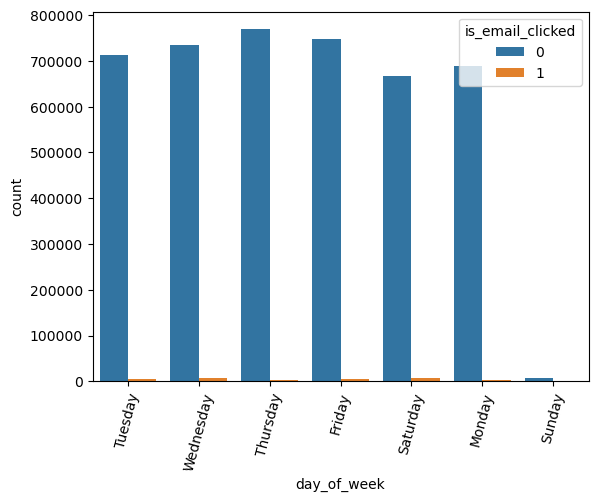

In [306]:
sns.countplot(x='day_of_week',data=prospect_engagements,hue='is_email_clicked')
plt.xticks(rotation=75)
plt.show()

## Has Ever Opened Email

In [309]:
not_clicked_prospects['has_ever_opened_email']=not_clicked_prospects['total_emails_opened'].apply(lambda x : 1 if x>0 else 0)

In [311]:
not_clicked_prospects.shape

(148051, 44)

In [313]:
not_clicked_prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148051 entries, 0 to 148050
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Company Name                    147664 non-null  object 
 1   First Name                      148050 non-null  object 
 2   Middle Name                     5602 non-null    object 
 3   Last Name                       148026 non-null  object 
 4   Title                           148046 non-null  object 
 5   Level                           139500 non-null  object 
 6   Seniority                       2724 non-null    object 
 7   Department                      139500 non-null  object 
 8   Email ID                        136901 non-null  object 
 9   Email 1                         11150 non-null   object 
 10  Contact_City                    126034 non-null  object 
 11  Contact_State                   111357 non-null  object 
 12  Contact City    

In [315]:
not_clicked_prospects.to_csv('../datasets/clicked_data/not_clicked_prospects.csv')